In [ ]:
!pip install scikit-multiflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254672 sha256=b0a02dc5536e09bff87cb7d1950912c1be8f4fd1d2798f984a991d21c1b9fb2c
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


**HOEFFDING TREE CLASSIFIER**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skmultiflow.trees import HoeffdingTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def data_stream(X, y, batch_size=1000):
    for i in range(0, len(X), batch_size):
        yield X[i:i+batch_size], y[i:i+batch_size]
data = pd.read_csv('UROPDATASET2.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1 - Accuracy: 0.8490914690483523, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Iteration 2 - Accuracy: 0.8464736680012319, Precision: 0.49265341400172863, Recall: 0.5816326530612245, F1-Score: 0.5334581188582125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 3 - Accuracy: 0.8490914690483523, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Iteration 4 - Accuracy: 0.910378811210348, Precision: 0.6870300751879699, Recall: 0.7459183673469387, F1-Score: 0.7152641878669275
Iteration 5 - Accuracy: 0.9180782260548198, Precision: 0.7271805273833671, Recall: 0.7316326530612245, F1-Score: 0.7293997965412005
Iteration 6 - Accuracy: 0.9180782260548198, Precision: 0.7271805273833671, Recall: 0.7316326530612245, F1-Score: 0.7293997965412005
Iteration 7 - Accuracy: 0.9180782260548198, Precision: 0.7271805273833671, Recall: 0.7316326530612245, F1-Score: 0.7293997965412005
Iteration 8 - Accuracy: 0.9177702494610409, Precision: 0.7257085020242915, Recall: 0.7316326530612245, F1-Score: 0.7286585365853658
Iteration 9 - Accuracy: 0.9142285186325839, Precision: 0.7075564278704612, Recall: 0.7357142857142858, F1-Score: 0.7213606803401702
Iteration 10 - Accuracy: 0.9151524484139205, Precision: 0.7109144542772862, Recall: 0.7377551020408163, F1-Score: 0.724086

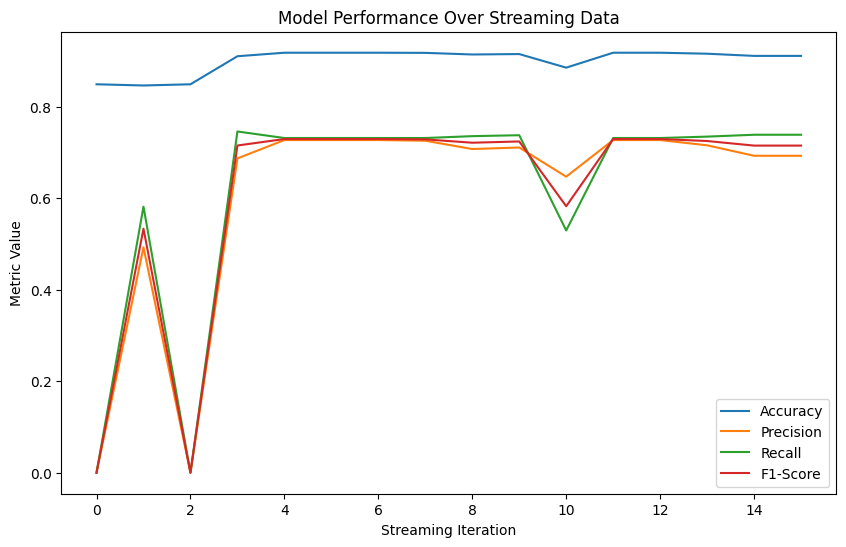

In [ ]:
threshold = data['Intensity59'].median()
data['Label'] = data['Intensity59'].apply(lambda x: 1 if x > threshold else 0)

X = data.drop(columns=['Id', 'ActivityHour', 'Intensity59', 'Label']).values
y = data['Label'].values
split_index = int(0.7 * len(data))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
ht = HoeffdingTreeClassifier()
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
batch_size = 1000
for stream_batch_X, stream_batch_y in data_stream(X_train, y_train, batch_size=batch_size):
    ht = ht.partial_fit(stream_batch_X, stream_batch_y, classes=np.unique(y))
    y_pred = ht.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print(f"Iteration {len(accuracy_list)} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
plt.figure(figsize=(10, 6))

plt.plot(accuracy_list, label='Accuracy')
plt.plot(precision_list, label='Precision')
plt.plot(recall_list, label='Recall')
plt.plot(f1_list, label='F1-Score')

plt.title('Model Performance Over Streaming Data')
plt.xlabel('Streaming Iteration')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

**SGD CLASSIFIER**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def data_stream(X, y, batch_size=1000):
    for i in range(0, len(X), batch_size):
        yield X.iloc[i:i+batch_size], y.iloc[i:i+batch_size]
data = pd.read_csv('UROPDATASET2.csv')

Iteration 1 - Accuracy: 0.849, Precision: 0.8185045454545454, Recall: 0.849, F1-Score: 0.8216950510913209
Iteration 2 - Accuracy: 0.886, Precision: 0.8705127695921419, Recall: 0.886, F1-Score: 0.8764586015281691
Iteration 3 - Accuracy: 0.94, Precision: 0.9313419913419914, Recall: 0.94, F1-Score: 0.933070890358296
Iteration 4 - Accuracy: 0.91, Precision: 0.9117804198822897, Recall: 0.91, F1-Score: 0.9083663523094516
Iteration 5 - Accuracy: 0.841, Precision: 0.8677858099062918, Recall: 0.841, F1-Score: 0.8497677673925653
Iteration 6 - Accuracy: 0.854, Precision: 0.8606723797780518, Recall: 0.854, F1-Score: 0.8566332116788321
Iteration 7 - Accuracy: 0.834, Precision: 0.85667001598306, Recall: 0.834, F1-Score: 0.8414618402050341
Iteration 8 - Accuracy: 0.845, Precision: 0.8179714489655849, Recall: 0.845, F1-Score: 0.823608189179242


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Iteration 9 - Accuracy: 0.94, Precision: 0.9360752642706132, Recall: 0.94, F1-Score: 0.9333287708546135
Iteration 10 - Accuracy: 0.8, Precision: 0.7807302902225979, Recall: 0.8, F1-Score: 0.7865034887502372
Iteration 11 - Accuracy: 0.836, Precision: 0.8483538306451612, Recall: 0.836, F1-Score: 0.8401725477207356
Iteration 12 - Accuracy: 0.832, Precision: 0.835208387942333, Recall: 0.832, F1-Score: 0.8304243619557856
Iteration 13 - Accuracy: 0.806, Precision: 0.8058143158211651, Recall: 0.806, F1-Score: 0.8039888949818754
Iteration 14 - Accuracy: 0.869, Precision: 0.8632310736484371, Recall: 0.869, F1-Score: 0.8576904757261765
Iteration 15 - Accuracy: 0.905, Precision: 0.9055841077980945, Recall: 0.905, F1-Score: 0.9051281407035175
Iteration 16 - Accuracy: 0.928, Precision: 0.9256147930590726, Recall: 0.928, F1-Score: 0.9255362993052804
Iteration 17 - Accuracy: 0.891, Precision: 0.8850956952037353, Recall: 0.891, F1-Score: 0.8861296437151123
Iteration 18 - Accuracy: 0.852, Precision: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Iteration 19 - Accuracy: 0.88, Precision: 0.880400462140064, Recall: 0.88, F1-Score: 0.8751617816611856
Iteration 20 - Accuracy: 0.907, Precision: 0.8991762126231736, Recall: 0.907, F1-Score: 0.9030691942668991
Iteration 21 - Accuracy: 0.946, Precision: 0.9385499462943072, Recall: 0.946, F1-Score: 0.9418601912478215
Iteration 22 - Accuracy: 0.8883720930232558, Precision: 0.8754928379462477, Recall: 0.8883720930232558, F1-Score: 0.880560903710884


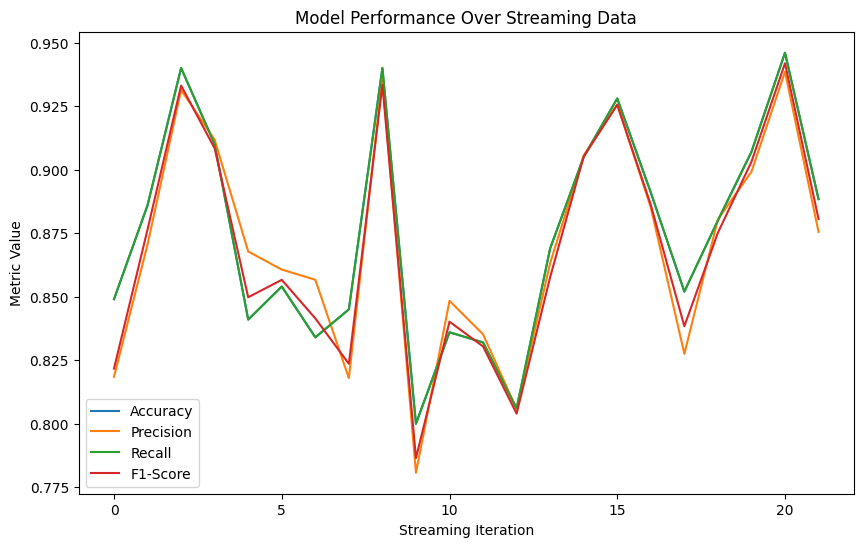

In [ ]:
data['ActivityHour'] = pd.to_datetime(data['ActivityHour'], errors='coerce')
data['ActivityHour'] = data['ActivityHour'].dt.strftime('%d/%m/%Y')
data = data.dropna(subset=['ActivityHour'])
X = data.loc[:, 'Intensity01':'Intensity59']
y = data['Intensity00']
sgd = SGDClassifier()
scaler = StandardScaler()
unique_classes = set()
X_scaled = scaler.fit_transform(X)
sgd.partial_fit(X_scaled, y, classes=np.unique(y))
unique_classes.update(np.unique(y))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
stream_batch_size = 1000
for stream_batch_X, stream_batch_y in data_stream(X, y, batch_size=stream_batch_size):
    X_batch_scaled = scaler.transform(stream_batch_X.loc[:, 'Intensity01':'Intensity59'])
    y_batch = stream_batch_y
    unique_classes.update(np.setdiff1d(np.unique(y_batch), unique_classes))
    sgd.partial_fit(X_batch_scaled, y_batch, classes=list(unique_classes))
    predictions = sgd.predict(X_batch_scaled)
    accuracy = accuracy_score(y_batch, predictions)
    precision = precision_score(y_batch, predictions, average='weighted')
    recall = recall_score(y_batch, predictions, average='weighted')
    f1 = f1_score(y_batch, predictions, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print(f"Iteration {len(accuracy_list)} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
plt.figure(figsize=(10, 6))

plt.plot(accuracy_list, label='Accuracy')
plt.plot(precision_list, label='Precision')
plt.plot(recall_list, label='Recall')
plt.plot(f1_list, label='F1-Score')

plt.title('Model Performance Over Streaming Data')
plt.xlabel('Streaming Iteration')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

**STREAMING K MEANS **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1 - Silhouette Score: 0.4924200301436464
Iteration 2 - Silhouette Score: 0.6061535447911498
Iteration 3 - Silhouette Score: 0.6935310788942993
Iteration 4 - Silhouette Score: 0.6959160561618343
Iteration 5 - Silhouette Score: 0.4073544834741762
Iteration 6 - Silhouette Score: 0.44536183764893594
Iteration 7 - Silhouette Score: 0.354478080151734
Iteration 8 - Silhouette Score: 0.4124060704331791
Iteration 9 - Silhouette Score: 0.7286301281359752
Iteration 10 - Silhouette Score: 0.4110508229078188
Iteration 11 - Silhouette Score: 0.40595109979070343
Iteration 12 - Silhouette Score: 0.3798814751690452
Iteration 13 - Silhouette Score: 0.43573912414912364
Iteration 14 - Silhouette Score: 0.48501307828906043
Iteration 15 - Silhouette Score: 0.49936900275843554
Iteration 16 - Silhouette Score: 0.6773865510690865
Iteration 17 - Silhouette Score: 0.42205247845677946
Iteration 18 - Silhouette Score: 0.5429726456303337
Iteration 19 - Silhouette Score: 0.5710425674193218
Iteration 20 - S

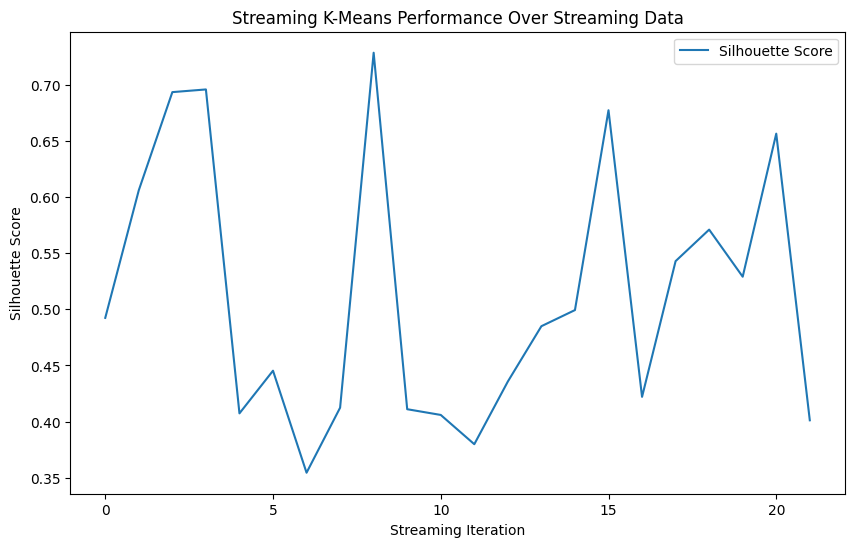

In [ ]:

def data_stream(X, batch_size=1000):
    for i in range(0, len(X), batch_size):
        yield X.iloc[i:i + batch_size]

data = pd.read_csv('UROPDATASET2.csv')
data['ActivityHour'] = pd.to_datetime(data['ActivityHour'], errors='coerce')
data['ActivityHour'] = data['ActivityHour'].dt.strftime('%d/%m/%Y')
data = data.dropna(subset=['ActivityHour'])
X = data.loc[:, 'Intensity01':'Intensity59']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
silhouette_scores = []

stream_batch_size = 1000
for stream_batch_X in data_stream(X, batch_size=stream_batch_size):
    X_batch_scaled = scaler.transform(stream_batch_X.loc[:, 'Intensity01':'Intensity59'])
    kmeans.partial_fit(X_batch_scaled)

    # Evaluate clustering performance
    labels = kmeans.predict(X_batch_scaled)
    silhouette = silhouette_score(X_batch_scaled, labels)
    silhouette_scores.append(silhouette)

    print(f"Iteration {len(silhouette_scores)} - Silhouette Score: {silhouette}")

plt.figure(figsize=(10, 6))
plt.plot(silhouette_scores, label='Silhouette Score')
plt.title('Streaming K-Means Performance Over Streaming Data')
plt.xlabel('Streaming Iteration')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


**PREPROCESSING **

In [ ]:
import pandas as pd

original_data = pd.read_csv('UROPDATASET2.csv')
original_data['ActivityHour'] = pd.to_datetime(original_data['ActivityHour'], errors='coerce')
original_data['ActivityHour'] = original_data['ActivityHour'].dt.strftime('%d/%m/%Y')
original_data = original_data.dropna(subset=['ActivityHour'])
original_data.to_csv('UROPDATASET2_preprocessed.csv', index=False)